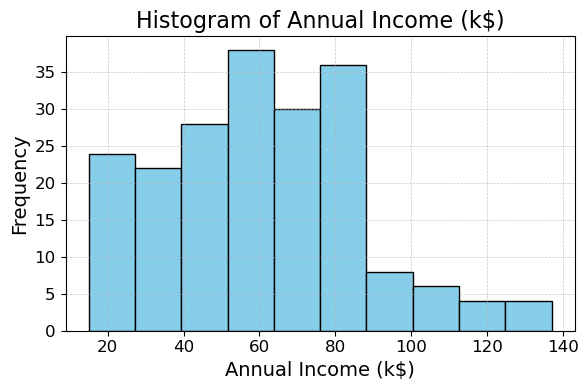

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Load and Preprocess the Data
df = pd.read_csv('Mall_Customers.csv')

df['Gender_Encoded'] = df['Gender'].map({'Male':1,'Female':0})

X_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Variables for classification
X_class = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
y_class = df['Gender_Encoded'].values

# 1. Histogram Function
def plot_histogram(data, column, title="Histogram", xlabel="Value", ylabel="Frequency"):
    plt.figure(figsize=(6,4))
    plt.hist(data[column], bins=10, edgecolor='black', color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot histogram of Annual Income
plot_histogram(df, 'Annual Income (k$)', title="Histogram of Annual Income (k$)", xlabel="Annual Income (k$)")



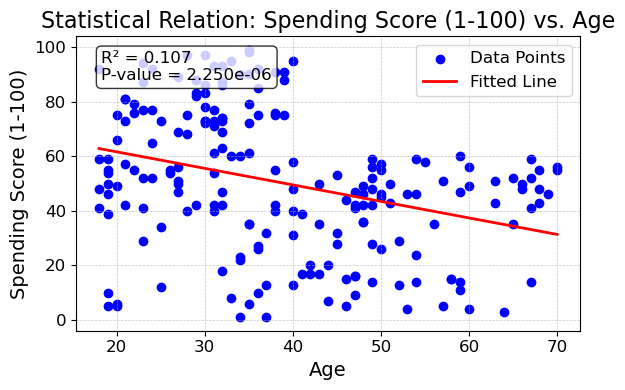

In [2]:
# 2. Statistical Relation (Line Graph with Linear Regression)
def plot_statistical_relation(data, x_col, y_col):
    # Prepare the data for the regression
    X = data[[x_col]]
    Y = data[y_col]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    
    intercept = model.params['const']
    slope = model.params[x_col]
    r_squared = model.rsquared
    p_value = model.pvalues[x_col]

    x_vals = np.linspace(data[x_col].min(), data[x_col].max(), 100)
    y_vals = intercept + slope * x_vals

    plt.figure(figsize=(6,4))
    plt.scatter(data[x_col], data[y_col], color='blue', label='Data Points')
    plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Fitted Line')

    plt.title(f"Statistical Relation: {y_col} vs. {x_col}", fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    stats_text = f"R² = {r_squared:.3f}\nP-value = {p_value:.3e}"
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_statistical_relation(df, 'Age', 'Spending Score (1-100)')


<Figure size 600x600 with 0 Axes>

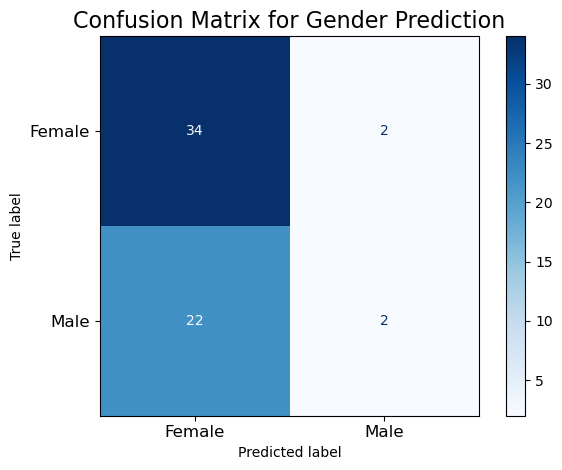

In [3]:
# 3. Confusion Matrix Function (Classification)
def plot_confusion_matrix(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Female","Male"])
    
    plt.figure(figsize=(6,6))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix for Gender Prediction", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(X_class, y_class)

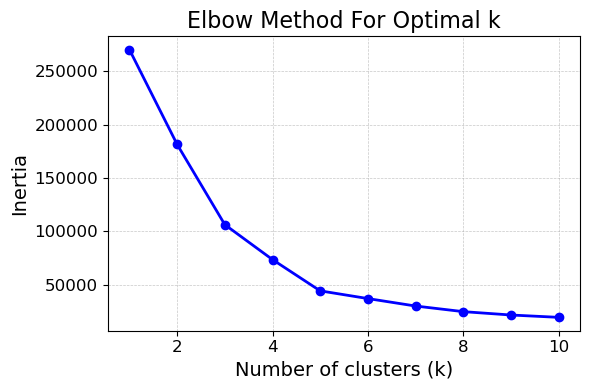

In [4]:
# 4. Elbow Plot for K-Means Function
def plot_elbow(X, max_k=10):
    distortions = []
    K = range(1, max_k+1)
    for k in K:
        kmeanModel = KMeans(n_init=10, n_clusters=k, random_state=42)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)
        
    plt.figure(figsize=(6,4))
    plt.plot(K, distortions, 'bo-', linewidth=2)
    plt.title('Elbow Method For Optimal k', fontsize=16)
    plt.xlabel('Number of clusters (k)', fontsize=14)
    plt.ylabel('Inertia', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Create elbow plot
plot_elbow(X_cluster, max_k=10)

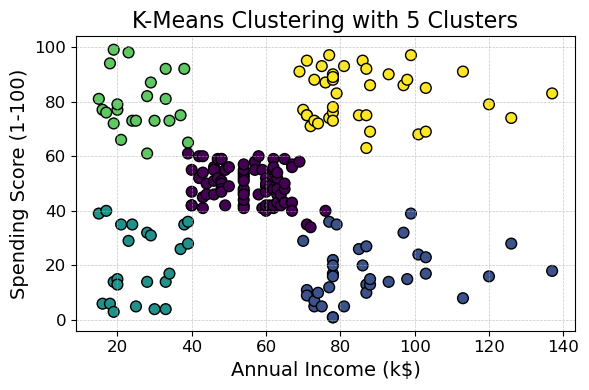

In [5]:
# K-Means Clustering and Visualization Function
def perform_kmeans(X, n_clusters=5):
    kmeans = KMeans(n_init=10, n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    plt.figure(figsize=(6,4))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=60, edgecolor='black')
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.title(f'K-Means Clustering with {n_clusters} Clusters', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    return labels

# Perform and visualize K-Means with a chosen number of clusters (e.g. 5)
_ = perform_kmeans(X_cluster, n_clusters=5)

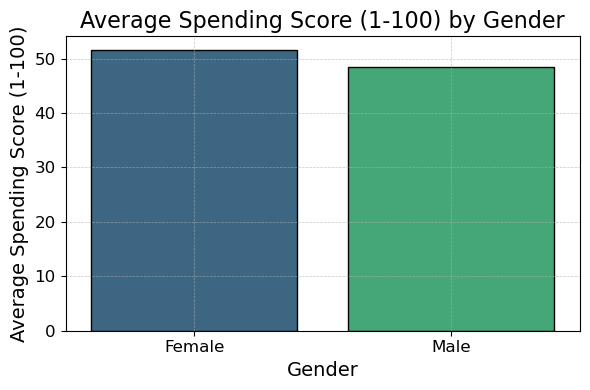

In [6]:
# Bar Chart Comparing Multiple Categories Function
def plot_category_comparison(data, category_col, value_col):
    # Calculate mean values for each category
    category_means = data.groupby(category_col)[value_col].mean().reset_index()
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=category_col, y=value_col, data=category_means, palette="viridis", edgecolor='black')
    
    plt.title(f"Average {value_col} by {category_col}", fontsize=16)
    plt.xlabel(category_col, fontsize=14)
    plt.ylabel(f"Average {value_col}", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Compare average Spending Score by Gender
plot_category_comparison(df, 'Gender', 'Spending Score (1-100)')